In [539]:
# data handling
import numpy as np
import pandas as pd

# math
import math

# data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# unsupervised learning models
from sklearn.cluster import KMeans

## Extracting the Data

In [540]:
# extracting data through the csv files
outlet_db = pd.read_csv('../Semifinal Round/Datasets/outlets_data.csv')
product_db = pd.read_csv('../Semifinal Round/Datasets/product_data.csv')
freezer_db = pd.read_csv('../Semifinal Round/Datasets/freezer_data.csv')
week_db = pd.read_csv('../Semifinal Round/Datasets/week_data.csv')
sales_db = pd.read_csv('../Semifinal Round/Datasets/sales_data.csv') 

#### Outlet Data

In [541]:
outlet_db

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [542]:
outlet_db.describe()

,area(sqft)
count,988.000000
mean,4288.656883
std,2451.617799
min,123.000000
25%,2325.750000
50%,3958.500000
75%,5836.000000
max,9950.000000


In [543]:
outlet_db.isnull().sum()

Outlet_ID     0
area(sqft)    0
dtype: int64

#### Product Data

In [544]:
product_db

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [545]:
product_db.describe()

,volume,price
count,10.000000,10.000000
mean,0.600000,605.000000
std,0.421637,534.628635
min,0.200000,90.000000
25%,0.200000,100.000000
50%,0.600000,555.000000
75%,1.000000,1100.000000
max,1.000000,1200.000000


In [546]:
product_db['price_per_volume'] = product_db['price'] / product_db['volume']
product_db

,pid,volume,product_name,price,price_per_volume
0,IP1,0.2,Vanilla Mini Cone,100,500.0
1,IP2,0.2,Chocolate Petite Bar,90,450.0
2,IP3,0.2,Strawberry Tiny Cup,110,550.0
3,IP4,0.2,Mint Bite-size Pop,100,500.0
4,IP5,0.2,Butter Pecan Small Stick,100,500.0
5,BP1,1.0,Chocolate Fudge Big Scoop,1200,1200.0
6,BP2,1.0,Moose Tracks Jumbo Cup,1100,1100.0
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150,1150.0
8,BP4,1.0,Rocky Road Mega Tub,1000,1000.0
9,BP5,1.0,Cookies and Cream Mega Tub,1100,1100.0


In [547]:
product_db

,pid,volume,product_name,price,price_per_volume
0,IP1,0.2,Vanilla Mini Cone,100,500.0
1,IP2,0.2,Chocolate Petite Bar,90,450.0
2,IP3,0.2,Strawberry Tiny Cup,110,550.0
3,IP4,0.2,Mint Bite-size Pop,100,500.0
4,IP5,0.2,Butter Pecan Small Stick,100,500.0
5,BP1,1.0,Chocolate Fudge Big Scoop,1200,1200.0
6,BP2,1.0,Moose Tracks Jumbo Cup,1100,1100.0
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150,1150.0
8,BP4,1.0,Rocky Road Mega Tub,1000,1000.0
9,BP5,1.0,Cookies and Cream Mega Tub,1100,1100.0


Since the bulk items have a higher price per volume ratio than impulse items, it would be better to emphasize on bulk items 

#### Freezer Data

In [548]:
freezer_db

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [549]:
freezer_db.describe()

,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
count,10.000000,10.000000
mean,90.000000,2840.000000
std,54.467115,823.542484
min,25.000000,1600.000000
25%,57.500000,2550.000000
50%,77.500000,2800.000000
75%,115.000000,3150.000000
max,200.000000,4500.000000


In [550]:
freezer_db['cost_per_volume'] = round(freezer_db['Power and maitainance Cost (LKR) per 100 hours'] / freezer_db['Volume Capacity (Liters)'],2)
freezer_db.sort_values(by='cost_per_volume')

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours,cost_per_volume
9,IceTech,M010,200,4500,22.50
4,IceBlast Pro,M005,150,3500,23.33
2,CoolTech,M003,120,3200,26.67
6,FreezeTech,M007,100,3000,30.00
8,ChillTech,M009,80,2800,35.00
1,FreezeZone,M002,75,2800,37.33
5,IceBlast,M006,65,2700,41.54
0,ChillMaster,M001,55,2500,45.45
3,mini CoolTech,M004,30,1800,60.00
7,FreezeTech 3.0,M008,25,1600,64.00


By the above sorting, we can see that it is more cost optimal to have large volume capacity freezers for shops in terms of the cost

#### Week Data

In [551]:
week_db

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023
5,Week 6,2/6/2023,2/12/2023
6,Week 7,2/13/2023,2/19/2023
7,Week 8,2/20/2023,2/26/2023
8,Week 9,2/27/2023,3/5/2023
9,Week 10,3/6/2023,3/12/2023


#### Sales Data

In [552]:
sales_db

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


In [553]:
sales_db.describe()

,week,no_units
count,81000.000000,81000.000000
mean,6.504432,373.143543
std,3.453426,370.546966
min,1.000000,20.000000
25%,4.000000,79.000000
50%,7.000000,210.000000
75%,10.000000,593.000000
max,12.000000,1499.000000


In [554]:
sales_db.isna().sum()

Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
dtype: int64

Since none of the data exhibit any missing values, we will assume there is no preprocessing required for the data

## Obtaining Master Table Sales

In [555]:
product_list = sales_db.product_name.unique()
product_list

array(['Vanilla Mini Cone', 'Chocolate Petite Bar', 'Strawberry Tiny Cup',
       'Mint Bite-size Pop', 'Butter Pecan Small Stick',
       'Chocolate Fudge Big Scoop', 'Moose Tracks Jumbo Cup',
       'Mint Chocolate Chip Family Pack', 'Rocky Road Mega Tub',
       'Cookies and Cream Mega Tub'], dtype=object)

In [556]:
impulse_products = product_list[:5]
bulk_products = product_list[5:]

In [557]:
outlet_sales_db = pd.merge(outlet_db, sales_db)
outlet_sales_db = pd.merge(outlet_sales_db, product_db)
outlet_sales_db

,Outlet_ID,area(sqft),week,pid,product_name,no_units,volume,price,price_per_volume
0,ID7203,5660,1,IP1,Vanilla Mini Cone,874.0,0.2,100,500.0
1,ID7203,5660,2,IP1,Vanilla Mini Cone,644.0,0.2,100,500.0
2,ID7203,5660,3,IP1,Vanilla Mini Cone,600.0,0.2,100,500.0
3,ID7203,5660,4,IP1,Vanilla Mini Cone,106.0,0.2,100,500.0
4,ID7203,5660,5,IP1,Vanilla Mini Cone,775.0,0.2,100,500.0
...,...,...,...,...,...,...,...,...,...
87383,ID8207,3539,6,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0
87384,ID8207,3539,7,BP5,Cookies and Cream Mega Tub,62.0,1.0,1100,1100.0
87385,ID8207,3539,9,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0
87386,ID8207,3539,11,BP5,Cookies and Cream Mega Tub,37.0,1.0,1100,1100.0


In [558]:
outlet_sales_db['is_bulk_item'] = outlet_sales_db.product_name.isin(bulk_products).astype(int)

In [559]:
outlet_sales_db

,Outlet_ID,area(sqft),week,pid,product_name,no_units,volume,price,price_per_volume,is_bulk_item
0,ID7203,5660,1,IP1,Vanilla Mini Cone,874.0,0.2,100,500.0,0
1,ID7203,5660,2,IP1,Vanilla Mini Cone,644.0,0.2,100,500.0,0
2,ID7203,5660,3,IP1,Vanilla Mini Cone,600.0,0.2,100,500.0,0
3,ID7203,5660,4,IP1,Vanilla Mini Cone,106.0,0.2,100,500.0,0
4,ID7203,5660,5,IP1,Vanilla Mini Cone,775.0,0.2,100,500.0,0
...,...,...,...,...,...,...,...,...,...,...
87383,ID8207,3539,6,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0,1
87384,ID8207,3539,7,BP5,Cookies and Cream Mega Tub,62.0,1.0,1100,1100.0,1
87385,ID8207,3539,9,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0,1
87386,ID8207,3539,11,BP5,Cookies and Cream Mega Tub,37.0,1.0,1100,1100.0,1


In [560]:
outlet_sales_db['tot_volume'] = outlet_sales_db['no_units'] * outlet_sales_db['volume']
outlet_sales_db

,Outlet_ID,area(sqft),week,pid,product_name,no_units,volume,price,price_per_volume,is_bulk_item,tot_volume
0,ID7203,5660,1,IP1,Vanilla Mini Cone,874.0,0.2,100,500.0,0,174.8
1,ID7203,5660,2,IP1,Vanilla Mini Cone,644.0,0.2,100,500.0,0,128.8
2,ID7203,5660,3,IP1,Vanilla Mini Cone,600.0,0.2,100,500.0,0,120.0
3,ID7203,5660,4,IP1,Vanilla Mini Cone,106.0,0.2,100,500.0,0,21.2
4,ID7203,5660,5,IP1,Vanilla Mini Cone,775.0,0.2,100,500.0,0,155.0
...,...,...,...,...,...,...,...,...,...,...,...
87383,ID8207,3539,6,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0,1,68.0
87384,ID8207,3539,7,BP5,Cookies and Cream Mega Tub,62.0,1.0,1100,1100.0,1,62.0
87385,ID8207,3539,9,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0,1,68.0
87386,ID8207,3539,11,BP5,Cookies and Cream Mega Tub,37.0,1.0,1100,1100.0,1,37.0


In [561]:
outlet_sales_db['tot_sales'] = outlet_sales_db['no_units'] * outlet_sales_db['price']
outlet_sales_db

,Outlet_ID,area(sqft),week,pid,product_name,no_units,volume,price,price_per_volume,is_bulk_item,tot_volume,tot_sales
0,ID7203,5660,1,IP1,Vanilla Mini Cone,874.0,0.2,100,500.0,0,174.8,87400.0
1,ID7203,5660,2,IP1,Vanilla Mini Cone,644.0,0.2,100,500.0,0,128.8,64400.0
2,ID7203,5660,3,IP1,Vanilla Mini Cone,600.0,0.2,100,500.0,0,120.0,60000.0
3,ID7203,5660,4,IP1,Vanilla Mini Cone,106.0,0.2,100,500.0,0,21.2,10600.0
4,ID7203,5660,5,IP1,Vanilla Mini Cone,775.0,0.2,100,500.0,0,155.0,77500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87383,ID8207,3539,6,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0,1,68.0,74800.0
87384,ID8207,3539,7,BP5,Cookies and Cream Mega Tub,62.0,1.0,1100,1100.0,1,62.0,68200.0
87385,ID8207,3539,9,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0,1,68.0,74800.0
87386,ID8207,3539,11,BP5,Cookies and Cream Mega Tub,37.0,1.0,1100,1100.0,1,37.0,40700.0


## Grouping Sales Data by Outlet

In [562]:
outlet_table = outlet_db.copy()

In [563]:
all_outlet_index = outlet_table.Outlet_ID
all_outlet_index = all_outlet_index.dropna()
all_outlet_index

0      ID7203
1      ID1878
2      ID1740
3      ID4366
4      ID8358
        ...  
983    ID4119
984    ID2978
985    ID6549
986    ID1210
987    ID8207
Name: Outlet_ID, Length: 988, dtype: object

In [564]:
## function to add new features to the database
def add_new_feature(database, col_name, new_series):
    database[col_name] = 0
    i=0
    for idx in database.Outlet_ID:
        database.loc[i, col_name] = new_series.loc[idx][0]
        i+=1
    return database

In [565]:
num_product_types = pd.DataFrame(outlet_sales_db.groupby('Outlet_ID')['pid'].nunique())
outlet_table = add_new_feature(outlet_table, 'num_product_types', num_product_types)

In [566]:
num_product_types.describe()

,pid
count,951.000000
mean,7.560463
std,2.500584
min,5.000000
25%,5.000000
50%,10.000000
75%,10.000000
max,10.000000


Therefore all stores sell exatcly 5 or 10 different types of items

In [567]:
bulk_sales = outlet_sales_db.loc[outlet_sales_db.product_name.isin(bulk_products)]
impulse_sales = outlet_sales_db.loc[outlet_sales_db.product_name.isin(impulse_products)]

In [568]:
bulk_sales

,Outlet_ID,area(sqft),week,pid,product_name,no_units,volume,price,price_per_volume,is_bulk_item,tot_volume,tot_sales
43355,ID8631,4024,1,BP1,Chocolate Fudge Big Scoop,77.0,1.0,1200,1200.0,1,77.0,92400.0
43356,ID8631,4024,2,BP1,Chocolate Fudge Big Scoop,38.0,1.0,1200,1200.0,1,38.0,45600.0
43357,ID8631,4024,3,BP1,Chocolate Fudge Big Scoop,98.0,1.0,1200,1200.0,1,98.0,117600.0
43358,ID8631,4024,4,BP1,Chocolate Fudge Big Scoop,51.0,1.0,1200,1200.0,1,51.0,61200.0
43359,ID8631,4024,5,BP1,Chocolate Fudge Big Scoop,80.0,1.0,1200,1200.0,1,80.0,96000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87383,ID8207,3539,6,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0,1,68.0,74800.0
87384,ID8207,3539,7,BP5,Cookies and Cream Mega Tub,62.0,1.0,1100,1100.0,1,62.0,68200.0
87385,ID8207,3539,9,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1100.0,1,68.0,74800.0
87386,ID8207,3539,11,BP5,Cookies and Cream Mega Tub,37.0,1.0,1100,1100.0,1,37.0,40700.0


In [569]:
num_bulk_items = pd.DataFrame(bulk_sales.groupby('Outlet_ID')['product_name'].nunique(), index=all_outlet_index)
num_bulk_items.describe()

,product_name
count,753.0
mean,5.0
std,0.0
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


In [570]:
num_bulk_items.isna().sum()

product_name    235
dtype: int64

Since all stores sell exactly 5 bulk item products we can conclude that all outlets sell bulk item products

In [571]:
num_impulse_items = pd.DataFrame(impulse_sales.groupby('Outlet_ID')['product_name'].nunique(), index=all_outlet_index)
num_impulse_items.describe()

,product_name
count,758.0
mean,5.0
std,0.0
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


In [572]:
num_impulse_items.isna().sum()

product_name    230
dtype: int64

In [573]:
outlet_table

,Outlet_ID,area(sqft),num_product_types
0,ID7203,5660,5
1,ID1878,4138,5
2,ID1740,5546,5
3,ID4366,5134,5
4,ID8358,4100,5
...,...,...,...
983,ID4119,3858,10
984,ID2978,3495,10
985,ID6549,1141,10
986,ID1210,3322,10


In [574]:
num_weeks_funct = pd.DataFrame(outlet_sales_db.groupby('Outlet_ID')['week'].nunique())
num_weeks_funct.describe()

,week
count,951.0
mean,12.0
std,0.0
min,12.0
25%,12.0
50%,12.0
75%,12.0
max,12.0


Since the minimum and maximum are both 12, we can conclude that all stores were functioning in the same 12 week

## Exploratory Data Analysis

#### Volume Based Analysis

<AxesSubplot:xlabel='Outlet_ID'>

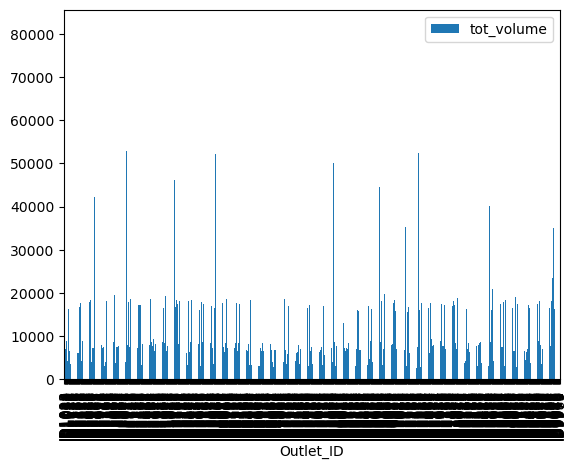

In [575]:
tot_volume_sold = pd.DataFrame(outlet_sales_db.groupby('Outlet_ID')['tot_volume'].sum())
tot_volume_sold = tot_volume_sold.reset_index()

tot_volume_sold.plot(x='Outlet_ID',y='tot_volume',kind='bar')

Text(0.5, 1.0, 'Histogram of Number of Outlets vs Total Volume of Items sold in the duration')

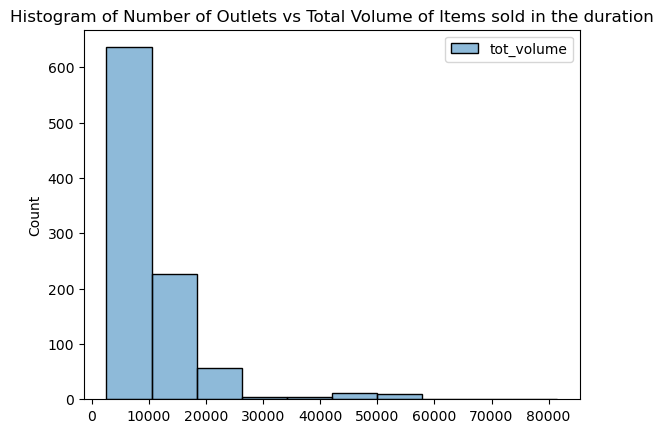

In [576]:
sns.histplot(data=tot_volume_sold, bins=10)
plt.title('Histogram of Number of Outlets vs Total Volume of Items sold in the duration')

In [577]:
weekly_volume_sold = pd.DataFrame(outlet_sales_db.groupby(['Outlet_ID','week'])['tot_volume'].sum())
weekly_volume_sold = weekly_volume_sold.reset_index()

weekly_volume_sold.tot_volume.describe()

count    11412.000000
mean       915.882702
std        733.119719
min         63.000000
25%        465.300000
50%        677.000000
75%       1290.050000
max       8040.400000
Name: tot_volume, dtype: float64

In [578]:
max_week_volume = pd.DataFrame(weekly_volume_sold.groupby('Outlet_ID')['tot_volume'].max())
max_week_volume.describe()

,tot_volume
count,951.000000
mean,1205.860358
std,869.528498
min,296.000000
25%,743.300000
50%,869.400000
75%,1805.900000
max,8040.400000


Text(0.5, 1.0, 'Histogram of Number of Outlets vs Maximum Volume of Items sold per Week')

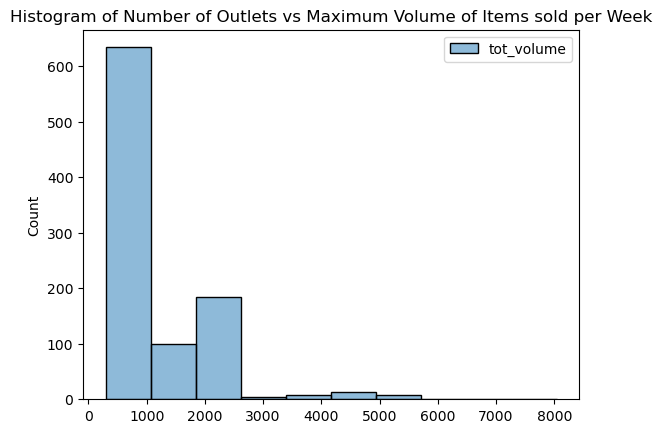

In [579]:
sns.histplot(data= max_week_volume, bins=10)
plt.title('Histogram of Number of Outlets vs Maximum Volume of Items sold per Week')

In [580]:
mean_week_volume = pd.DataFrame(weekly_volume_sold.groupby('Outlet_ID')['tot_volume'].mean().round(2))
mean_week_volume.describe()

,tot_volume
count,951.000000
mean,915.882692
std,705.681724
min,216.750000
25%,543.200000
50%,644.270000
75%,1403.150000
max,6793.330000


Text(0.5, 1.0, 'Histogram of Number of Outlets vs Mean Volume of Items sold per Week')

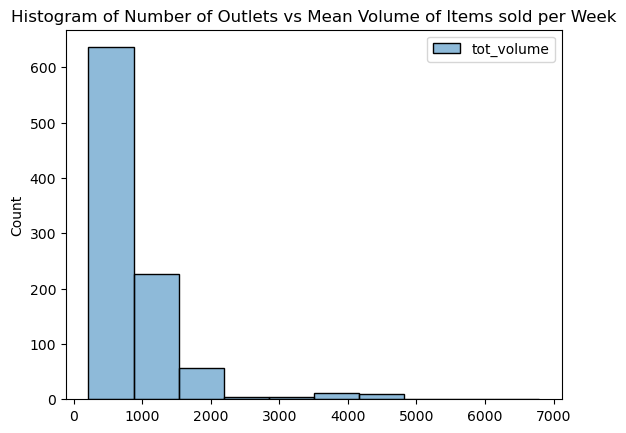

In [581]:
sns.histplot(data = mean_week_volume, bins=10)
plt.title('Histogram of Number of Outlets vs Mean Volume of Items sold per Week')

In [582]:
# adding the mean volume of items sold and max volume of items sold in a particular week into the dataset

max_week_volume.rename(columns={'tot_volume':'max_week_volume'}, inplace=True)
max_week_volume = max_week_volume.reset_index()
outlet_table = pd.merge(outlet_table, max_week_volume)

mean_week_volume.rename(columns={'tot_volume':'mean_week_volume'}, inplace=True)
mean_week_volume = mean_week_volume.reset_index()
outlet_table = pd.merge(outlet_table, mean_week_volume)

In [583]:
outlet_table

,Outlet_ID,area(sqft),num_product_types,max_week_volume,mean_week_volume
0,ID7203,5660,5,876.4,579.10
1,ID1878,4138,5,792.2,600.67
2,ID1740,5546,5,764.4,626.45
3,ID4366,5134,5,995.0,671.73
4,ID8358,4100,5,910.4,656.30
...,...,...,...,...,...
983,ID4119,3858,10,819.4,641.08
984,ID2978,3495,10,887.2,671.78
985,ID6549,1141,10,851.8,735.50
986,ID1210,3322,10,1025.6,710.57


#### Features regarding to Sales

In [584]:
weekly_tot_sales = pd.DataFrame(outlet_sales_db.groupby(['Outlet_ID', 'week'])['tot_sales'].sum())
weekly_avg_sales = pd.DataFrame(weekly_tot_sales.groupby('Outlet_ID')['tot_sales'].mean())
weekly_avg_sales

,tot_sales
Outlet_ID,
ID1008,2.742492e+05
ID1012,3.040542e+05
ID1024,6.438583e+05
ID1029,1.116763e+06
ID1036,5.282392e+05
...,...
ID9960,1.182026e+06
ID9971,3.048600e+05
ID9973,1.125119e+06


Text(0.5, 1.0, 'Histogram of Number of Outlets for Mean Weekly Sales')

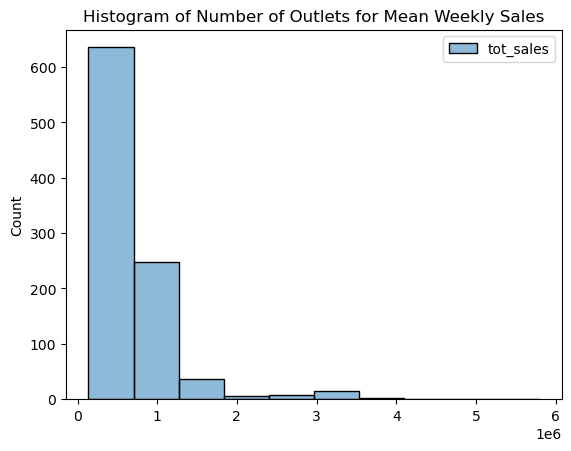

In [585]:
weekly_avg_sales2 = weekly_avg_sales.reset_index()
sns.histplot(data=weekly_avg_sales2, bins=10)
plt.title('Histogram of Number of Outlets for Mean Weekly Sales')

In [591]:
bulk_week_sales = pd.DataFrame(bulk_sales.groupby(['Outlet_ID','week'])['tot_sales'].sum() )
bulk_avg_week_sales = pd.DataFrame(bulk_week_sales.groupby('Outlet_ID')['tot_sales'].mean().round(2) , index = all_outlet_index)
bulk_avg_week_sales.rename(columns={'tot_sales':'bulk_avg_week_sales'}, inplace=True)
bulk_avg_week_sales = bulk_avg_week_sales.reset_index()
bulk_avg_week_sales = bulk_avg_week_sales.fillna(0)
bulk_avg_week_sales

,Outlet_ID,bulk_avg_week_sales
0,ID7203,0.00
1,ID1878,0.00
2,ID1740,0.00
3,ID4366,0.00
4,ID8358,0.00
...,...,...
983,ID4119,272129.17
984,ID2978,291354.17
985,ID6549,304529.17
986,ID1210,277025.00


In [590]:
outlet_table['bulk_avg_week_sales'] = 0
i=0
for idx in database.Outlet_ID:
    database.loc[i, col_name] = new_series.loc[idx][0]
    i+=1
return database

KeyError: 0

In [538]:
outlet_table

,Outlet_ID,area(sqft),num_product_types,max_week_volume,mean_week_volume,bulk_avg_week_sales
0,ID7203,5660,5,876.4,579.10,0.00
1,ID1878,4138,5,792.2,600.67,0.00
2,ID1740,5546,5,764.4,626.45,0.00
3,ID4366,5134,5,995.0,671.73,0.00
4,ID8358,4100,5,910.4,656.30,0.00
...,...,...,...,...,...,...
1057,ID4119,3858,10,819.4,641.08,272129.17
1058,ID2978,3495,10,887.2,671.78,291354.17
1059,ID6549,1141,10,851.8,735.50,304529.17
1060,ID1210,3322,10,1025.6,710.57,277025.00


In [537]:
outlet_table = pd.merge(outlet_table, bulk_avg_week_sales)

Text(0.5, 1.0, 'Histogram of Number of Outlets selling Bulk Items vs Mean Weekly Sales')

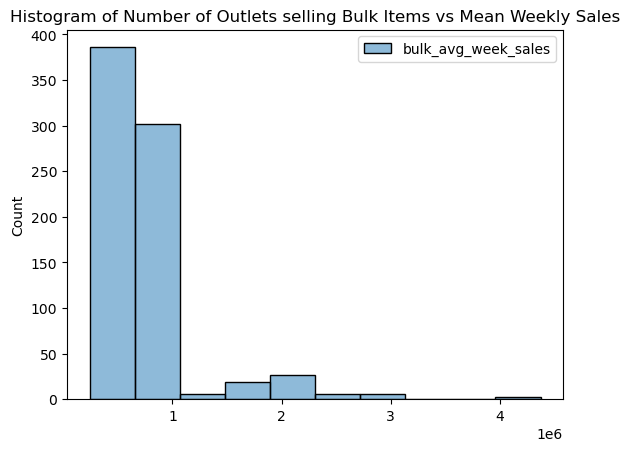

In [52]:
sns.histplot(data=bulk_avg_week_sales, bins=10)
plt.title('Histogram of Number of Outlets selling Bulk Items vs Mean Weekly Sales')

In [53]:
impulse_week_sales =pd.DataFrame(impulse_sales.groupby(['Outlet_ID','week'])['tot_sales'].sum())
impulse_avg_week_sales = pd.DataFrame(impulse_week_sales.groupby('Outlet_ID')['tot_sales'].mean().round(2) , index = all_outlet_index)
impulse_avg_week_sales.rename(columns={'tot_sales':'impulse_avg_week_sales'}, inplace=True)
impulse_avg_week_sales = impulse_avg_week_sales.reset_index()
impulse_avg_week_sales = impulse_avg_week_sales.fillna(0)

outlet_table = pd.merge(outlet_table, impulse_avg_week_sales)

Text(0.5, 1.0, 'Histogram of Number of Outlets selling Impulse Items vs Mean Weekly Sales')

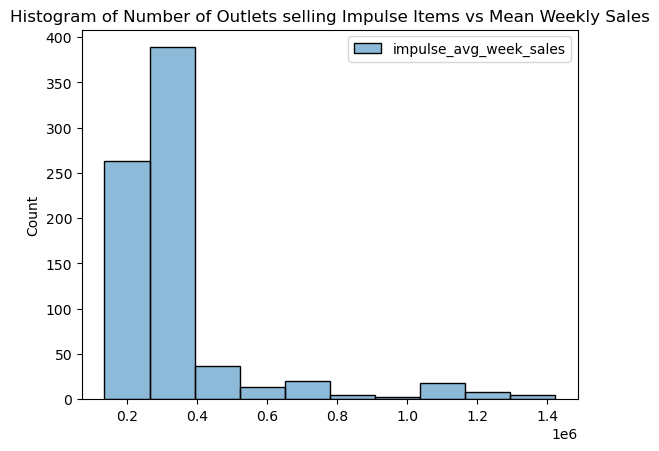

In [54]:
sns.histplot(data=impulse_avg_week_sales, bins=10)
plt.title('Histogram of Number of Outlets selling Impulse Items vs Mean Weekly Sales')

In [55]:
## for stores which didn't have any sales in a particular category were taken as zero 
outlet_table = outlet_table.fillna(0)

In [56]:
outlet_table

,Outlet_ID,area(sqft),num_product_types,max_week_volume,mean_week_volume,bulk_avg_week_sales,impulse_avg_week_sales
0,ID7203,5660,5,876.4,579.10,0.00,291076.67
1,ID1878,4138,5,792.2,600.67,0.00,300528.33
2,ID1740,5546,5,764.4,626.45,0.00,312992.50
3,ID4366,5134,5,995.0,671.73,0.00,338344.17
4,ID8358,4100,5,910.4,656.30,0.00,326558.33
...,...,...,...,...,...,...,...
1205,ID4119,3858,10,819.4,641.08,272129.17,197164.17
1206,ID2978,3495,10,887.2,671.78,291354.17,203870.00
1207,ID6549,1141,10,851.8,735.50,304529.17,229606.67
1208,ID1210,3322,10,1025.6,710.57,277025.00,229025.00


In [57]:
outlet_type =  pd.DataFrame(outlet_sales_db.groupby('Outlet_ID')['is_bulk_item'].mean())
outlet_type.loc[(outlet_type.is_bulk_item < 1) & (outlet_type.is_bulk_item > 0)] = 'Both'
outlet_type = outlet_type.replace(0,'Only Impulse')
outlet_type = outlet_type.replace(1,'Only Bulk')

Text(0.5, 1.0, 'Type of Outlets')

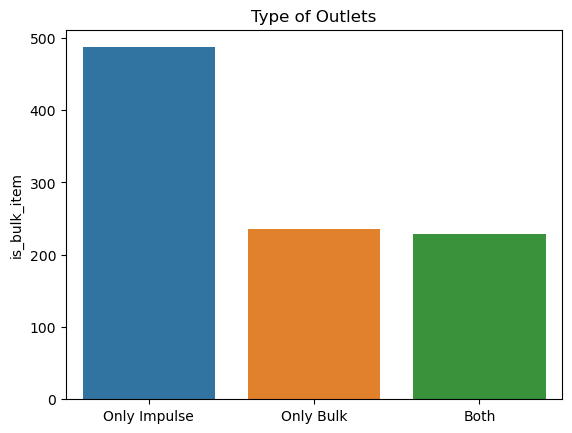

In [58]:
sns.barplot(x=outlet_type.is_bulk_item.unique(), y=outlet_type.is_bulk_item.value_counts())
plt.title('Type of Outlets')

## Applying Clustering Algorithm

#### Scaling the Data

In [59]:
outlet_feature_db = outlet_table.drop(columns=['Outlet_ID'])

In [60]:
std_scaler = StandardScaler()
data_cols = outlet_feature_db.columns
outlet_scaled = std_scaler.fit_transform(outlet_feature_db)
outlet_scaled = pd.DataFrame(outlet_scaled, columns=data_cols)

In [61]:
outlet_scaled

,area(sqft),num_product_types,max_week_volume,mean_week_volume,bulk_avg_week_sales,impulse_avg_week_sales
0,0.526113,-1.252598,-0.620504,-0.670011,-0.987437,-0.234230
1,-0.083247,-1.252598,-0.674445,-0.653324,-0.987437,-0.206213
2,0.480471,-1.252598,-0.692255,-0.633380,-0.987437,-0.169265
3,0.315519,-1.252598,-0.544526,-0.598351,-0.987437,-0.094114
4,-0.098461,-1.252598,-0.598723,-0.610288,-0.987437,-0.129051
...,...,...,...,...,...,...
1205,-0.195350,0.798341,-0.657020,-0.622062,-0.644020,-0.512618
1206,-0.340683,0.798341,-0.613586,-0.598312,-0.619759,-0.492739
1207,-1.283148,0.798341,-0.636264,-0.549017,-0.603133,-0.416447
1208,-0.409947,0.798341,-0.524923,-0.568303,-0.637842,-0.418172


In [255]:
n=5
kmeans = KMeans(n_clusters=n).fit(outlet_scaled)

In [256]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
kmeans.cluster_centers_

array([[-0.7149294 ,  0.79834063, -0.26490812, -0.26085112, -0.30990636,
        -0.17211653],
       [ 0.31029919, -1.25259815, -0.65787554, -0.66232587, -0.64940973,
        -0.58139917],
       [ 0.30653707,  0.79834063,  1.93668585,  1.95126821,  1.79508716,
         1.83849717],
       [ 1.13062969,  0.79834063,  0.10295354,  0.07015068,  0.11568623,
         0.01225997],
       [-1.05752528, -1.25259815, -0.86704582, -0.84274776, -0.66511645,
        -0.91076672]])

In [260]:
outlet_table['Label'] = kmeans.labels_

ValueError: Length of values (1210) does not match length of index (1062)